In [2]:
import sys
sys.path.append("../src")

import os
import pandas as pd
import cv2
from PIL import Image
import torch as th
from vit import ViT
from pydantic import BaseModel
from torchvision.transforms import Resize


In [3]:
ls /home/fatuus/data/headgear-image-classification/

'headgear-20-(224 X 224)- 98.99.h5'   test/
 headgear.csv.csv                     train/
 headgear-image-classification.zip    valid/


In [1]:
DIR_PATH = "/home/fatuus/data/headgear-image-classification/" 

In [2]:
image = cv2.imread("../001.jpg")
image = image / 255.0
image = torch.FloatTensor(image).permute(2, 0, 1)


In [5]:
image = Image.open("../001.jpg")

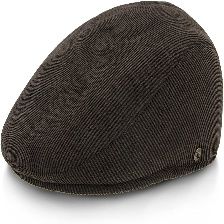

In [6]:
image

In [32]:
class Dataset(th.utils.data.Dataset):
    def __init__(self, dir_path: str, annotation: pd.DataFrame):
        self.dir_path = dir_path
        self.ann = annotation
    def __len__(self):
        return self.ann.shape[0]

    def __getitem__(self, index: int):
        path = os.path.join(self.dir_path,df["filepaths"].iloc[index])
        image = cv2.imread(path)
        image = image / 255.0
        image = torch.FloatTensor(image).permute(2, 0, 1)
        class_id = df["class id"].iloc[index]
        return image, class_id

In [3]:
fname = "headgear.csv.csv"
df = pd.read_csv(os.path.join(DIR_PATH, fname))

In [13]:
df.drop_duplicates?

Signature:
df.drop_duplicates(
    subset: 'Hashable | Sequence[Hashable] | None' = None,
    *,
    keep: 'DropKeep' = 'first',
    inplace: 'bool' = False,
    ignore_index: 'bool' = False,
) -> 'DataFrame | None'
Docstring:
Return DataFrame with duplicate rows removed.

Considering certain columns is optional. Indexes, including time indexes
are ignored.

Parameters
----------
subset : column label or sequence of labels, optional
    Only consider certain columns for identifying duplicates, by
    default use all of the columns.
keep : {'first', 'last', ``False``}, default 'first'
    Determines which duplicates (if any) to keep.

    - 'first' : Drop duplicates except for the first occurrence.
    - 'last' : Drop duplicates except for the last occurrence.
    - ``False`` : Drop all duplicates.

inplace : bool, default ``False``
    Whether to modify the DataFrame rather than creating a new one.
ignore_index : bool, default ``False``
    If ``True``, the resulting axis will be label

In [21]:
(
    df[["class id","labels"]]
    .drop_duplicates(ignore_index=True)
    .set_index("class id")["labels"]
    .to_dict()
)

{0: 'ASCOT CAP',
 1: 'BASEBALL CAP',
 2: 'BERET',
 3: 'BICORNE',
 4: 'BOATER',
 5: 'BOWLER',
 6: 'DEERSTALKER',
 7: 'FEDORA',
 8: 'FEZ',
 9: 'FOOTBALL HELMET',
 10: 'GARRISON CAP',
 11: 'HARD HAT',
 12: 'MILITARY HELMET',
 13: 'MOTARBOARD',
 14: 'PITH HELMET',
 15: 'PORK PIE',
 16: 'SOMBERO',
 17: 'SOUTHWESTER',
 18: 'TOP HAT',
 19: 'ZUCCHETTO'}

In [6]:
df["class id"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [38]:
dataset = Dataset(
    dir_path=DIR_PATH,
    annotation=df.loc[
        df["data set"]=="train",
        ["filepaths", "class id"]
    ]
)

In [8]:
df["data set"].unique()

array(['train', 'test', 'valid'], dtype=object)

In [39]:
dataset[-1]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 19)